<a href="https://colab.research.google.com/github/SAIKUMAR500/disaster-tweet/blob/main/disaster_tweet_classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
#machine learning
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
# machine learning
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from google.colab import drive
drive.mount('/content/drive')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:

df = pd.read_csv('/content/disaster_tweets.csv')
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df.describe()

id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

In [5]:
df.shape

(7613, 5)

In [14]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'length'], dtype='object')

In [17]:
df.columns=['id', 'keyword', 'location', 'tweets', 'target', 'length']
df.columns

Index(['id', 'keyword', 'location', 'tweets', 'target', 'length'], dtype='object')

In [18]:
df.head()

id keyword location                                             tweets  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length  
0       1      69  
1       1      38  
2       1     133  
3       1      65  
4       1      88

In [88]:
df.tweets[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

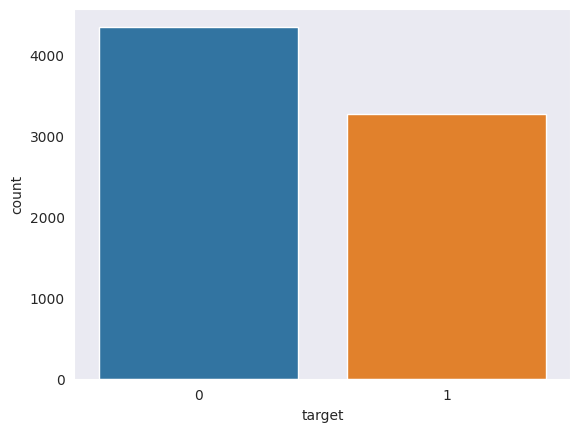

In [7]:
sns.countplot(x='target', data=df)
plt.show()


In [19]:
df['length'] = df['tweets'].apply(len)
df.head()


id keyword location                                             tweets  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length  
0       1      69  
1       1      38  
2       1     133  
3       1      65  
4       1      88

<Axes: ylabel='Frequency'>

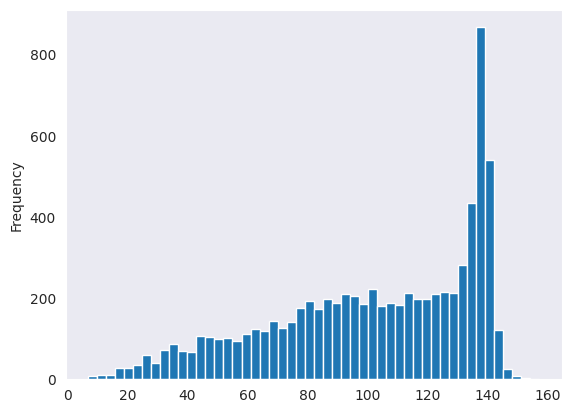

In [9]:
df['length'].plot(bins=50, kind='hist')

In [10]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [20]:
df[df['length'] == 157]['tweets'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

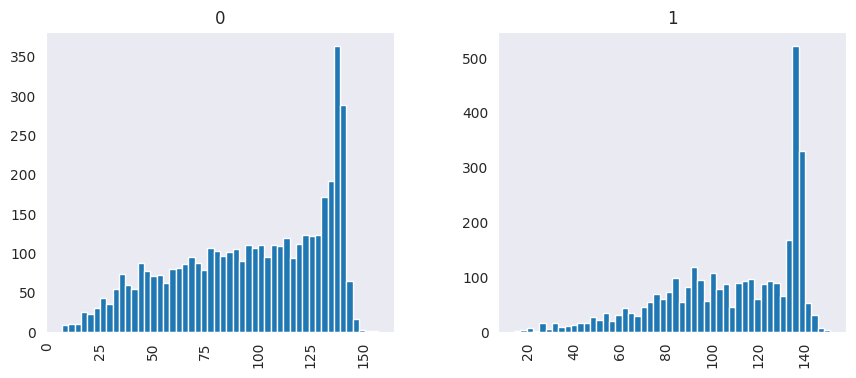

In [21]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [22]:

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [26]:
sw = stopwords.words('/content/disaster_tweets.csv')
print(sw)

['id,keyword,location,text,target', '1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1', '4,,,Forest fire near La Ronge Sask. Canada,1', "5,,,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1", '6,,,"13,000 people receive #wildfires evacuation orders in California ",1', '7,,,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ,1', '8,,,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1', '10,,,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1', "13,,,I'm on top of the hill and I can see a fire in the woods...,1", "14,,,There's an emergency evacuation happening now in the building across the street,1", "15,,,I'm afraid that the tornado is coming to our area...,1", '16,,,Three people died from the heat wave so far,1', '17,,,Haha Sou

In [27]:
lm = WordNetLemmatizer()

In [28]:
for i in df['tweets'].iloc[:5]:
    print(i)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [29]:
data = []
for i in df['tweets'].iloc[:5]:
    t = i.lower()                        # conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)        # removing punc => list if sentences
    t = word_tokenize(t)                 # word tokenization => list of list of words
    t = [i for i in t if i not in sw]    # removing the stop words
    t = [lm.lemmatize(i) for i in t]     # lemmatization
    t = " ".join(t)
    data.append(t)
print(data)

['our deed are the reason of this earthquake may allah forgive u all', 'forest fire near la ronge sask canada', 'all resident asked to shelter in place are being notified by officer no other evacuation or shelter in place order are expected', 'people receive wildfire evacuation order in california', 'just got sent this photo from ruby alaska a smoke from wildfire pours into a school']


In [32]:
cleansed_tweet = []
for i in df['tweets']:
    t = i.lower()                        # conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)        # removing punc => list if sentences
    t = word_tokenize(t)                 # word tokenization => list of list of words
    t = [i for i in t if i not in sw]    # removing the stop words
    t = [lm.lemmatize(i) for i in t]     # lemmatization
    t = " ".join(t)                      #
    cleansed_tweet.append(t)
print(cleansed_tweet)

['our deed are the reason of this earthquake may allah forgive u all', 'forest fire near la ronge sask canada', 'all resident asked to shelter in place are being notified by officer no other evacuation or shelter in place order are expected', 'people receive wildfire evacuation order in california', 'just got sent this photo from ruby alaska a smoke from wildfire pours into a school', 'rockyfire update california hwy closed in both direction due to lake county fire cafire wildfire', 'flood disaster heavy rain cause flash flooding of street in manitou colorado spring area', 'i m on top of the hill and i can see a fire in the wood', 'there s an emergency evacuation happening now in the building across the street', 'i m afraid that the tornado is coming to our area', 'three people died from the heat wave so far', 'haha south tampa is getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding', 'raining flooding florida tampabay tampa or d

In [50]:
print(len(cleansed_tweet))

7613


In [47]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    cleansed_tweet = []
    for i in text.split():

        if i.strip().lower() not in stop:
            cleansed_tweet.append(i.strip())
    return " ".join(cleansed_tweet)

df_1 = df[df['target']==1]
df_0 = df[df['target']==0]
df_1['tweets']=df_1['tweets'].apply(remove_stopwords)
df_0['tweets']=df_0['tweets'].apply(remove_stopwords)

<ipython-input-47-d83e5ac4a201>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['tweets']=df_1['tweets'].apply(remove_stopwords)
<ipython-input-47-d83e5ac4a201>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['tweets']=df_0['tweets'].apply(remove_stopwords)


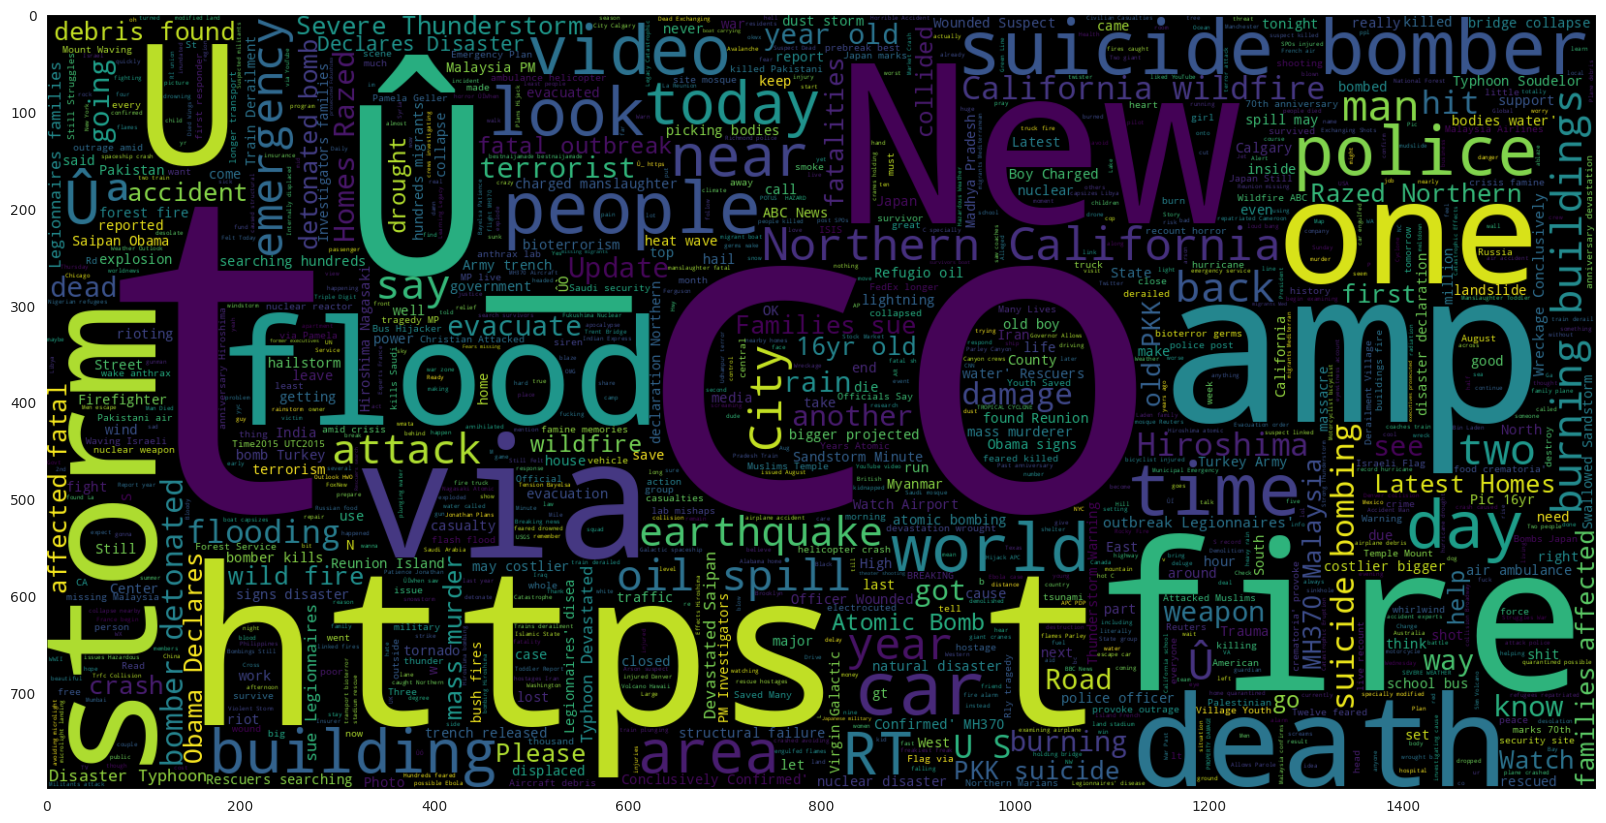

In [46]:

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Tweers that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_1.tweets))
plt.imshow(wc , interpolation = 'bilinear')

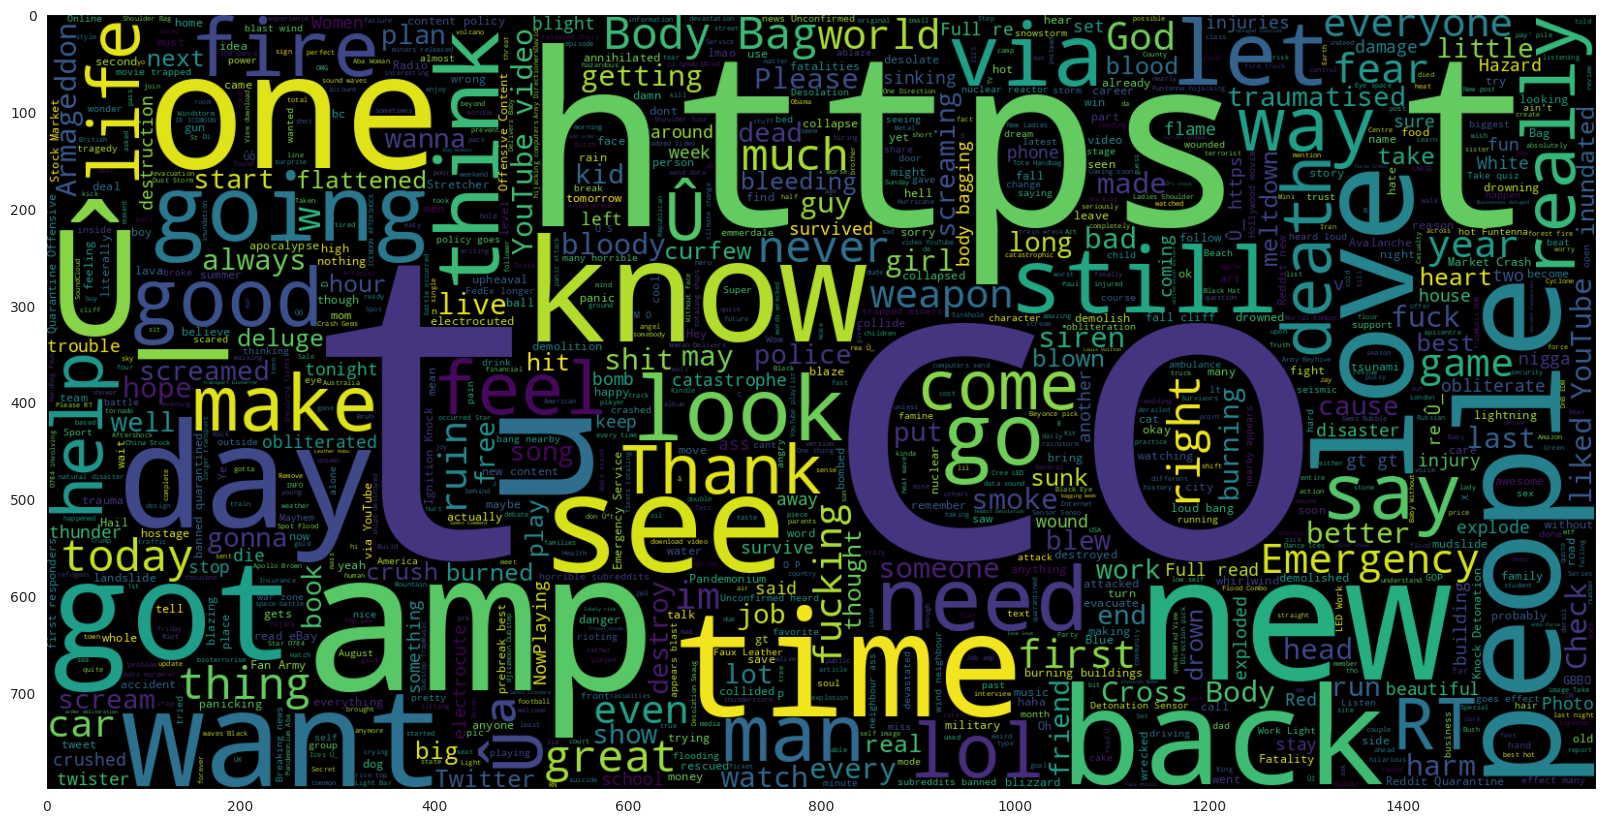

In [48]:

plt.figure(figsize = (20,20)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [35]:
x = np.array(cleansed_tweet)
y = df['target']
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,stratify=y, random_state=0)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

In [57]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)

MultinomialNB()

In [58]:

from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_mnb2.mean()

0.7899835796387521

Model  Accuracy  Precision  Sensitivity  \
0  Multinomial Naive Bayes - TFIDF-Bigram  0.798424   0.854806     0.639144   

   Specificity  F1 Score  
0     0.918297  0.731409

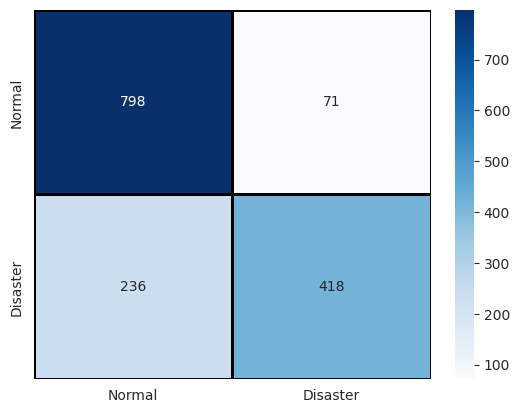

In [59]:
pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
mnb = MultinomialNB()
mnb.fit(tfidf_train_2,y_train)

MultinomialNB()

In [74]:
print('Train Score',mnb.score(tfidf_train_2,y_train))
print('Test Score',mnb.score(tfidf_test_2,y_test))

Train Score 0.9563218390804598
Test Score 0.7984241628365069


In [75]:
ypred = mnb.predict(tfidf_test_2)
print(len(ypred))

1523


In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[798  71]
 [236 418]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       869
           1       0.85      0.64      0.73       654

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.79      1523



In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
m1 = LogisticRegression()
m1.fit(tfidf_train_2,y_train)

LogisticRegression()

In [82]:
print('Train Score',m1.score(tfidf_train_2,y_train))  # Train Accuracy
print('Test Score',m1.score(tfidf_test_2,y_test))     # Test Accuracy

Train Score 0.91247947454844
Test Score 0.7964543663821405


In [83]:
m = m1.coef_
c = m1.intercept_
print(m)
print(c)

[[ 0.15212411  0.10762677 -0.05827045 ... -0.06626625  0.07072569
  -0.0607127 ]]
[-0.61511047]


In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [85]:
ypred_m1 = m1.predict(tfidf_test_2)
print(ypred_m1)

[0 0 0 ... 1 1 1]


In [86]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[753 116]
 [194 460]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.80      0.70      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
m1 = KNeighborsClassifier()
m1.fit(tfidf_train_2,y_train)

KNeighborsClassifier()

In [103]:
print('Train score',m1.score(tfidf_train_2,y_train))
print('Test score',m1.score(tfidf_test_2,y_test))

Train score 0.8216748768472907
Test score 0.7616546290216678


In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [107]:
ypred_m1 = m1.predict(tfidf_test_2)
print(ypred_m1)

[0 0 0 ... 0 1 1]


In [109]:
eval_model(y_test,ypred_m1)




[[786  83]
 [280 374]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       869
           1       0.82      0.57      0.67       654

    accuracy                           0.76      1523
   macro avg       0.78      0.74      0.74      1523
weighted avg       0.77      0.76      0.75      1523



In [112]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
x_train = tfidf_vectorizer_3.fit_transform(x_train)
x_test = tfidf_vectorizer_3.transform(x_test)

In [113]:

mnb_tf3 = MultinomialNB()
mnb_tf3.fit(x_train, y_train)

MultinomialNB()

In [116]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb3 = cross_val_score(estimator = mnb_tf, X = x_train, y = y_train, cv = kfold,scoring=scoring)
acc_mnb3.mean()

0.7850574712643679

Model  Accuracy  Precision  Sensitivity  \
0  Multinomial Naive Bayes - TFIDF-Trigram  0.796454   0.865957     0.622324   

   Specificity  F1 Score  
0     0.918297  0.724199

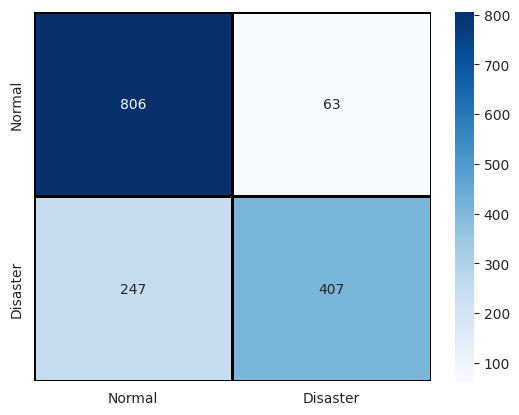

In [119]:

pred_mnb3 = mnb_tf3.predict(x_test)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_mnb3)
prec = precision_score(y_test, pred_mnb3)
rec = recall_score(y_test, pred_mnb3)
f1 = f1_score(y_test, pred_mnb3)

mod_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

mod_results

In [124]:

pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

## cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass3 = cross_val_score(estimator = pass_tf3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_pass3.mean()

0.7889983579638752

In [120]:

def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472

    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [125]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3,pass_tf3, n=10)

0 -2.180190669696602 let
0 -2.0554360624991954 love
0 -1.9741181413667106 bag
0 -1.9309712817664315 suicide bomb
0 -1.831554538717796 new
0 -1.7865294707031372 hrqcjdovjz
0 -1.7865294707031372 http hrqcjdovjz
0 -1.7865294707031372 mishap http hrqcjdovjz
0 -1.7506963038518595 traumatised
0 -1.7014392187432146 dianneg

1 4.213826268384263 http
1 3.790426678401005 hiroshima
1 3.5807804169902244 california
1 3.1417336327711993 building
1 2.9575751545447595 bombing
1 2.883700124547574 flood
1 2.8679896842788897 train
1 2.835947471502006 forest
1 2.8157647318012593 wildfire
1 2.577980770343245 japan


In [128]:

sentences = [
  "All residents asked to shelter in place are being notified by officers. No other evacuation or shelter in place orders are expected",
    "Heard about #earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]

tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf3.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()

text: All residents asked to shelter in place are being notified by officers. No other evacuation or shelter in place orders are expected 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet

